# Conceptor action #

In [117]:
from matplotlib import pyplot as plt
%matplotlib inline

np.random.seed(1)

First we configure the network for a given size and connectivity.

In [118]:
# network size
N = 100

# network connectivity
netConn = 10./N

### Weight Matrix ###
The initial weight matrix is randomly generated and sparse:

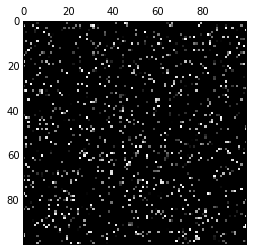

In [119]:
# initialize random weights
import scipy.sparse as sparse
W_raw = sparse.rand(N, N, density=netConn)

# sparse returns a coo-matrix, not the usual numpy matrix!

plt.matshow(W_raw.todense(), cmap=plt.cm.gray);

Now we scale the weight matrix such that the spectral radius (i.e. the largest eigenvalue) becomes 1. Therefore we first need to compute the spectral radius and divide by it.

In [120]:
import numpy as np
from scipy.sparse import linalg

# compute the k=1 eigenvalues and corresponding eigenvectors with 'LM': Largest Magnitude
specRad, largestEigenvec = np.abs(sparse.linalg.eigs(W_raw,k=1,which='LM'))
specRad

array([ 5.13523432])

In [121]:
W_raw = np.squeeze(np.asarray(W_raw/specRad))

# the new spectral radius is 1
np.abs(sparse.linalg.eigs(W_raw,k=1,which='LM'))[0]

array([ 1.])

### Input Matrix ###
Now we set the input weights to the reservoir. It is also randomly initialized with certain scaling factors.

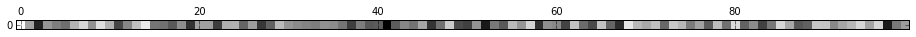

In [123]:
netInputScaling = 1.5
numInputDims = 1
W_in = netInputScaling*np.random.randn(N,numInputDims)
plt.matshow(W_in.T, cmap=plt.cm.gray);